In [1]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

In [3]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
pos = y_train == 1
neg = y_train == 0

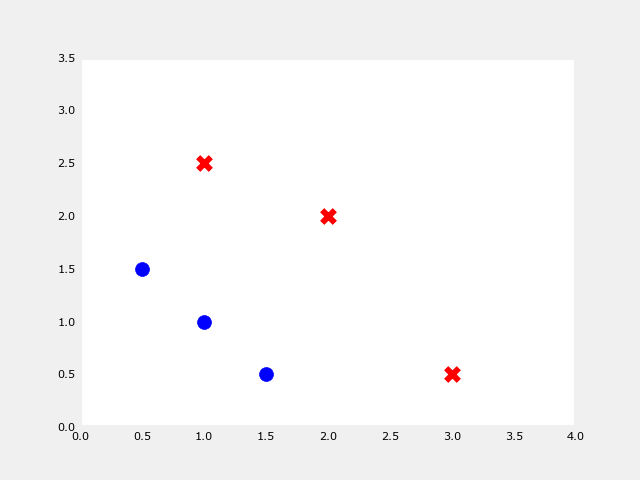

In [12]:
plt.scatter(X_train[pos, 0], X_train[pos, 1], marker="x", s=80, c="red")
plt.scatter(X_train[neg, 0], X_train[neg, 1], s=100, c="blue")
plt.axis([0, 4, 0, 3.5])
plt.show()

In [13]:
def current_sigmoid(z):
  g = 1 / (1 + np.exp(-z))
  return g

In [14]:
def compute_gradient(X, y, w, b):
  m, n = X.shape
  dj_dw = np.zeros(n)
  dj_db = 0
  for i in range(m):
    f_wb = np.dot(X[i], w) + b
    g = current_sigmoid(f_wb)
    err = g - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * X[i, j]
    dj_db += err
  dj_dw /= m
  dj_db /= m
  return dj_dw, dj_db

In [15]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: [0.49833339 0.49883943]
dj_dw: 0.49861806546328574


In [16]:
def gradient_descent(X, y, w_init, b_init, iterations, alpha, gradient_function):
  w = w_init
  b = b_init
  for _ in range(iterations):
    dj_dw, dj_db = gradient_function(X, y, w, b)
    w = w - dj_dw * alpha
    b = b - dj_db * alpha
  return w, b

In [18]:
print(gradient_descent(X_tmp, y_tmp, np.zeros(X_tmp.shape[1]), 0, 10000, 1.0e-1, compute_gradient))

(array([5.28123029, 5.07815608]), np.float64(-14.222409982019837))
